In [1]:
# libs
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip install scikit-learn

In [3]:
data=pd.read_csv(r'C:\Users\hey\OneDrive\Bureau\AI-trang\classData.csv')

In [4]:
data.shape

(7861, 10)

In [5]:
# import data 
data.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [6]:
# clean the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [7]:
# Combing all fault together in one Fault_Type:
data['Fault_Type'] =data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')
data.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [8]:
# name to the fault according to the data description
data['Fault_Type'][data['Fault_Type'] == '0000' ] = 'NO Fault'
data['Fault_Type'][data['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
data['Fault_Type'][data['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
data['Fault_Type'][data['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [9]:
data.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1670,1,0,1,1,57.689449,-793.773713,-55.193072,-0.036138,0.215027,-0.178889,Line A Line B to Ground Fault
6606,0,0,0,0,-67.167062,84.321050,-20.388788,-0.360100,-0.237198,0.597299,NO Fault
7043,0,0,0,0,-70.550428,53.481504,13.967164,-0.029734,-0.496963,0.526697,NO Fault
6076,0,0,0,0,39.232166,47.243829,-89.879794,-0.300012,0.626727,-0.326715,NO Fault
266,1,0,0,1,786.449054,25.660356,23.838534,0.115968,-0.441162,0.325194,Line A to Ground Fault
4022,0,1,1,1,-248.793661,859.331806,-608.500310,0.030423,0.010310,-0.040733,Line A Line B Line C
1469,1,0,1,1,-43.869149,787.089623,55.453138,0.036484,-0.219854,0.183369,Line A Line B to Ground Fault
2657,0,1,1,0,38.008170,204.671058,-239.963078,0.500466,0.040000,-0.540466,Line B to Line C Fault
3821,0,1,1,1,236.890640,-854.916220,620.103162,-0.030922,-0.009605,0.040526,Line A Line B Line C
6611,0,0,0,0,-68.890839,81.123404,-15.465811,-0.320024,-0.279456,0.599479,NO Fault


In [10]:
data['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

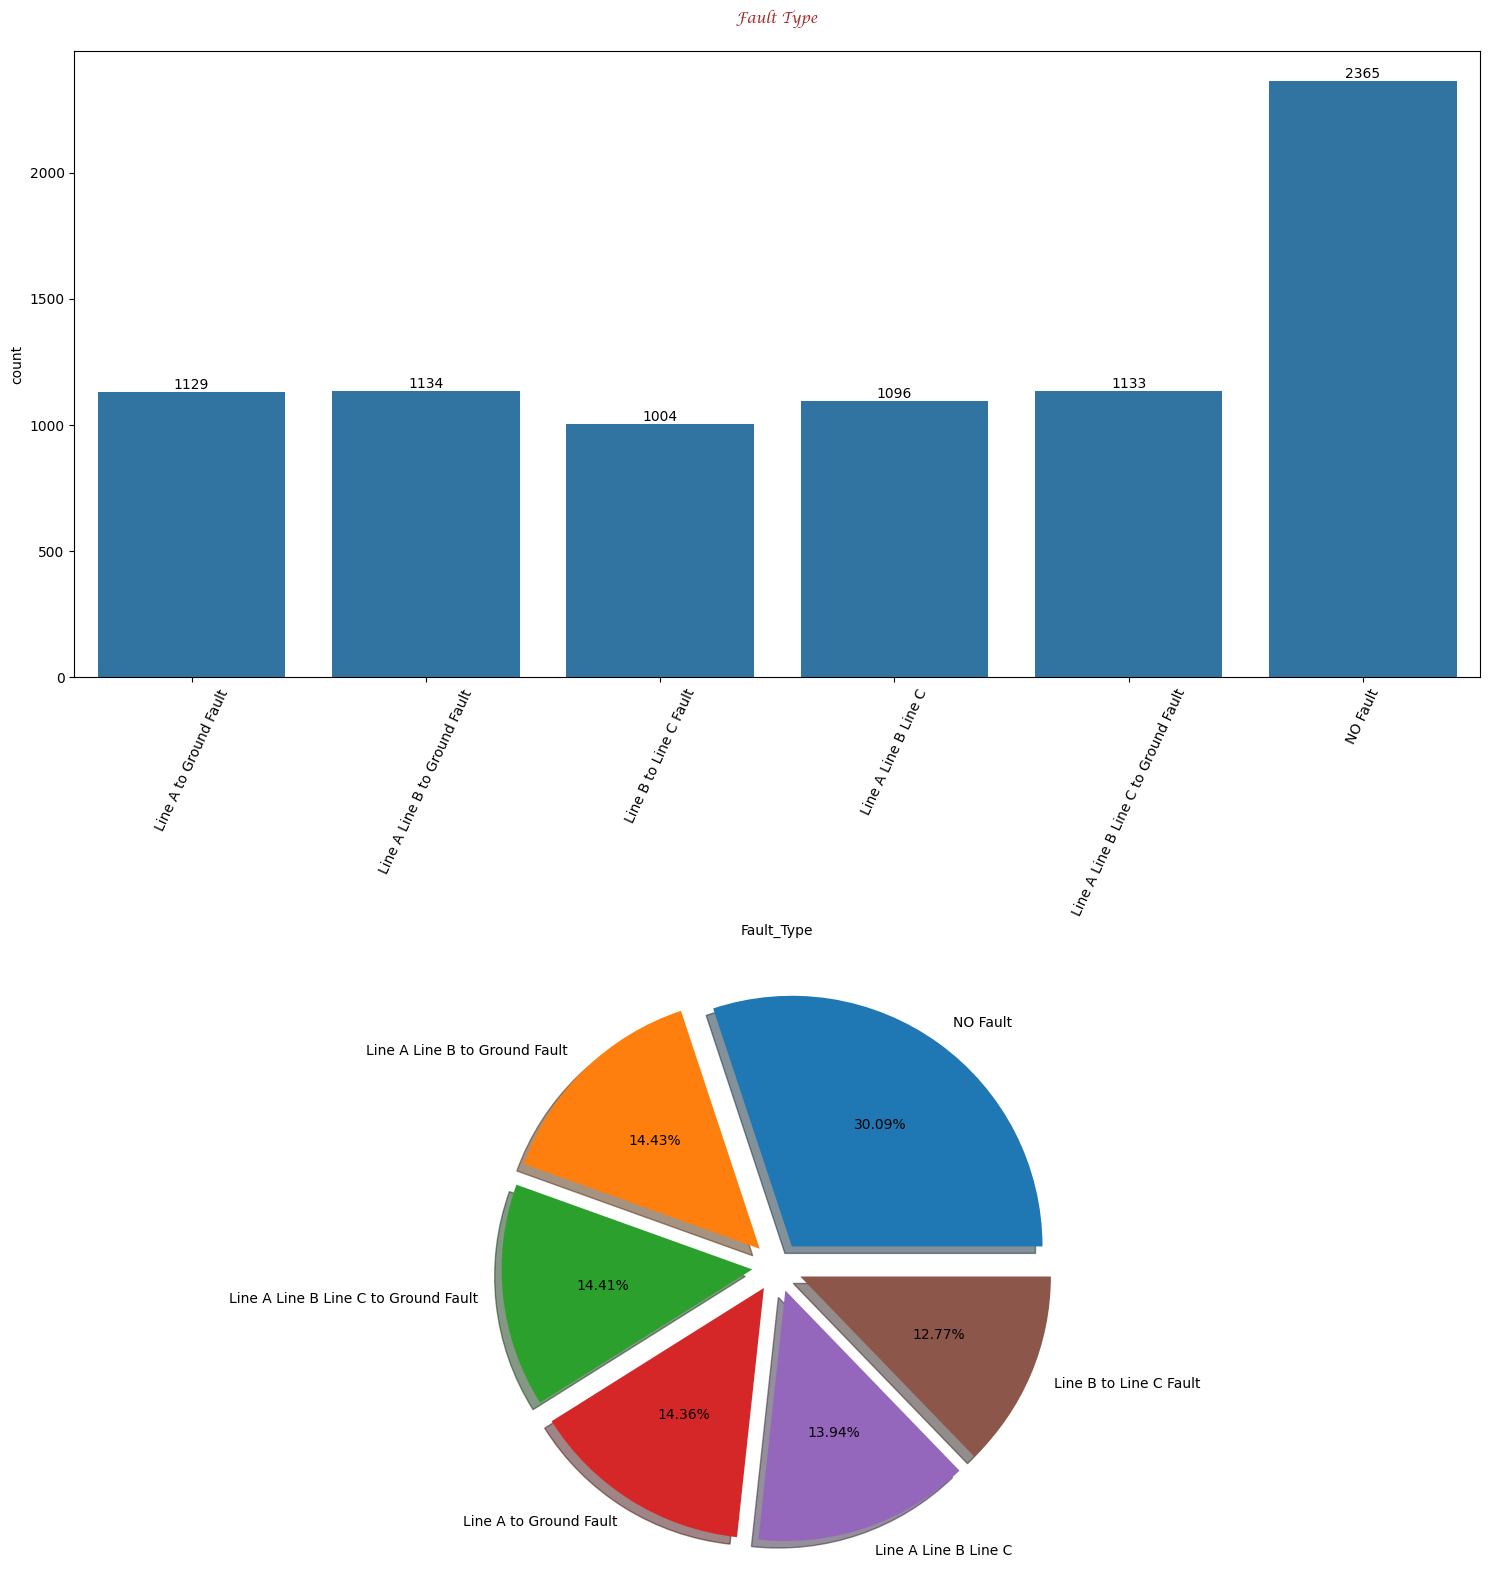

In [11]:
# Number of faults in the system according to their Fault_Type
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=data)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=data['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

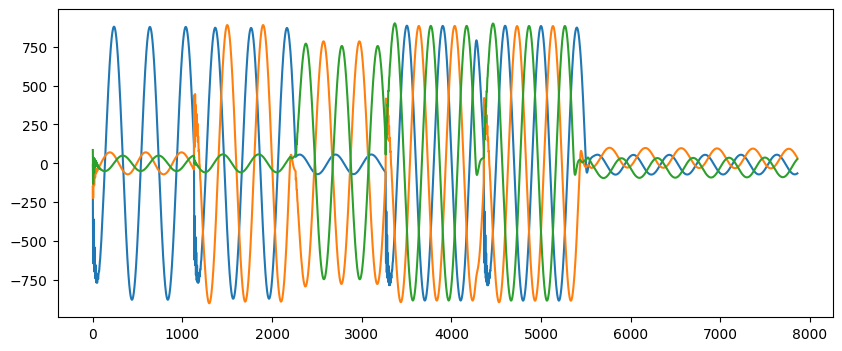

In [12]:
plt.figure(figsize = (10,4))
plt.plot(data["Ia"])
plt.plot(data["Ib"])
plt.plot(data["Ic"]);


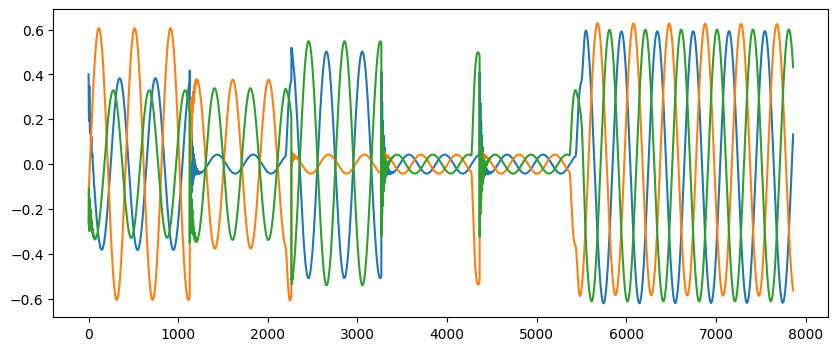

In [13]:
plt.figure(figsize = (10,4))
plt.plot(data["Va"])
plt.plot(data["Vb"])
plt.plot(data["Vc"]);

In [14]:
# Separating Faults into different Categories

In [15]:
# 1. No Fault (Healthy System)
No_Fault = data[data['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7094,0,0,0,0,-43.064529,3.959820,36.018114,0.410350,-0.567908,0.157558,NO Fault
6798,0,0,0,0,46.638726,-21.447609,-28.366776,0.392606,0.206217,-0.598824,NO Fault
6188,0,0,0,0,-58.406553,94.473497,-39.434332,-0.485592,-0.073111,0.558702,NO Fault
7363,0,0,0,0,-38.493721,94.997705,-59.511808,-0.593885,0.160881,0.433004,NO Fault
5506,0,0,0,0,-44.475403,-23.199384,25.273131,0.391999,-0.530910,0.138910,NO Fault


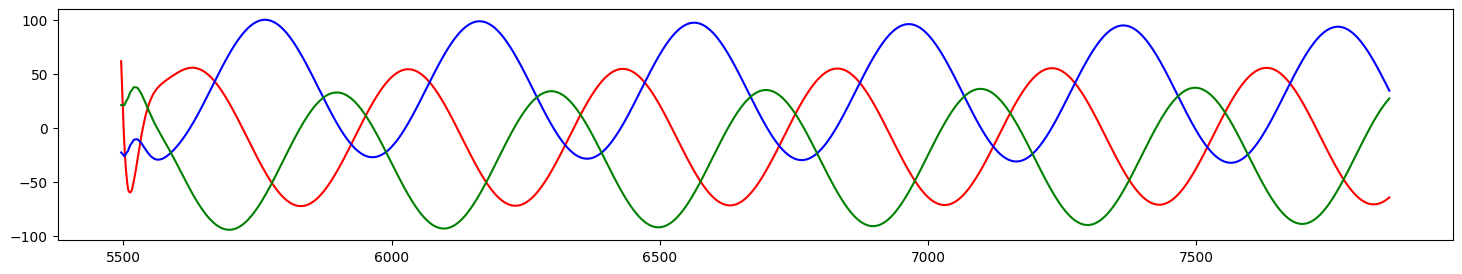

In [16]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

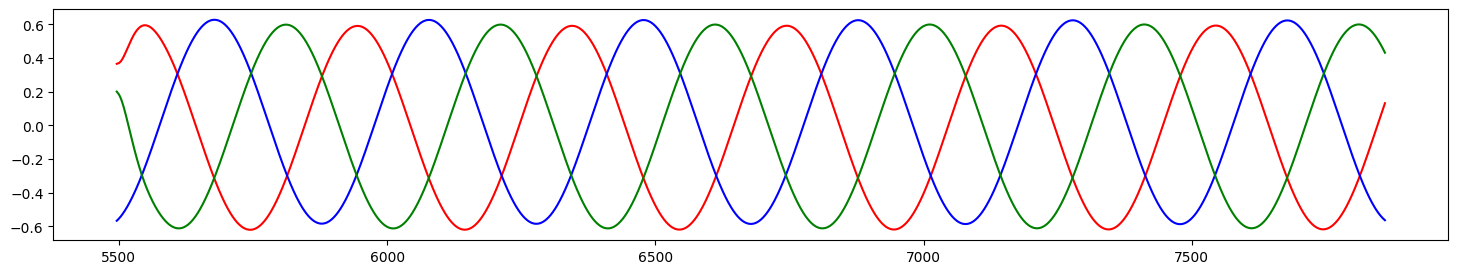

In [17]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

In [18]:
# 2. Faulty System with Line A to Ground Fault
Line_AG_Fault = data[data['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


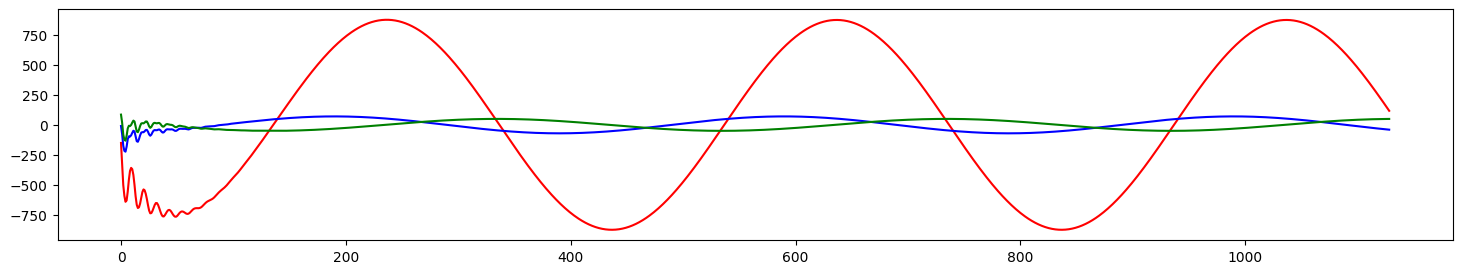

In [19]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

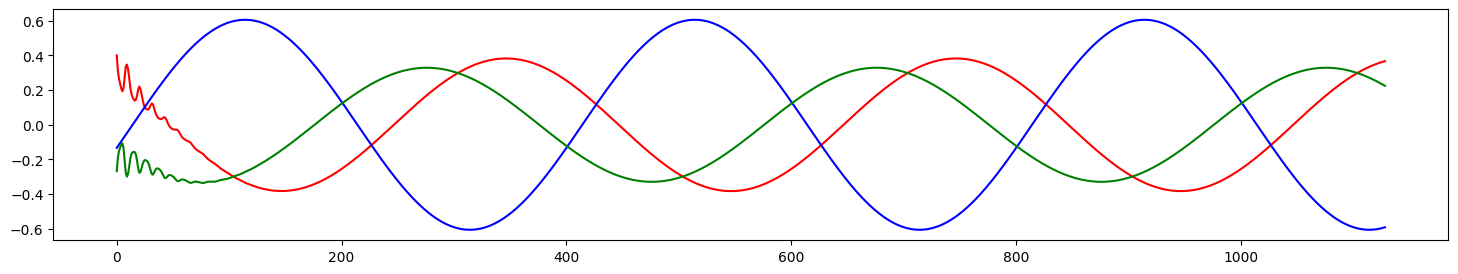

In [20]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

In [21]:
# Faulty System with Line A ,Line B to Ground Fault
Line_ABG_Fault = data[data['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


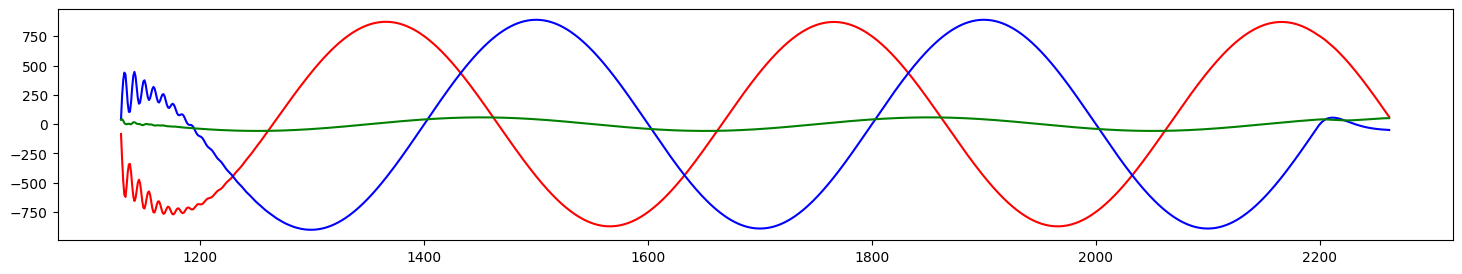

In [22]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

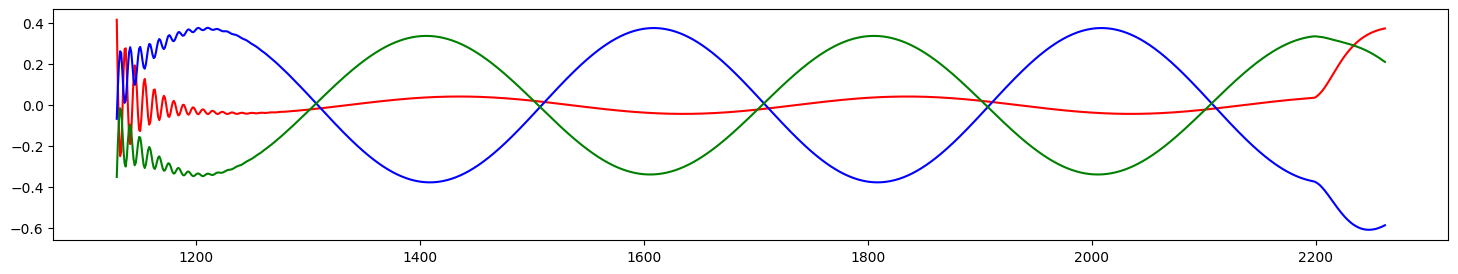

In [23]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

In [24]:
#  Faulty System with Line B to Line C
Line_BC_Fault = data[data['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


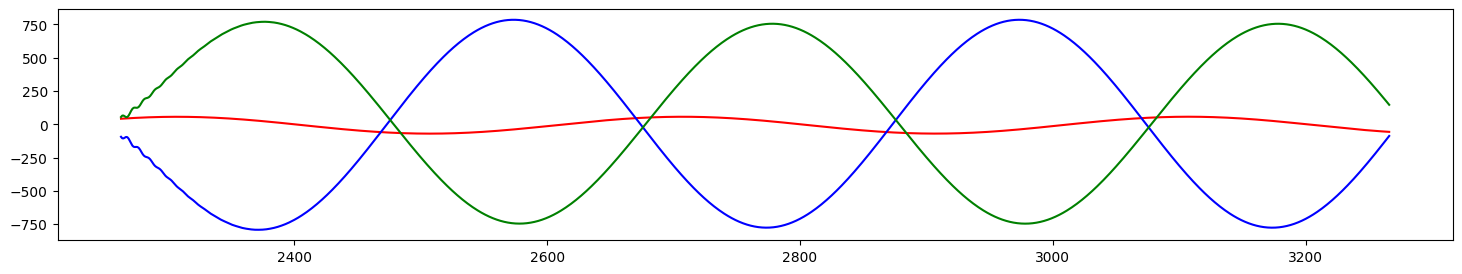

In [25]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

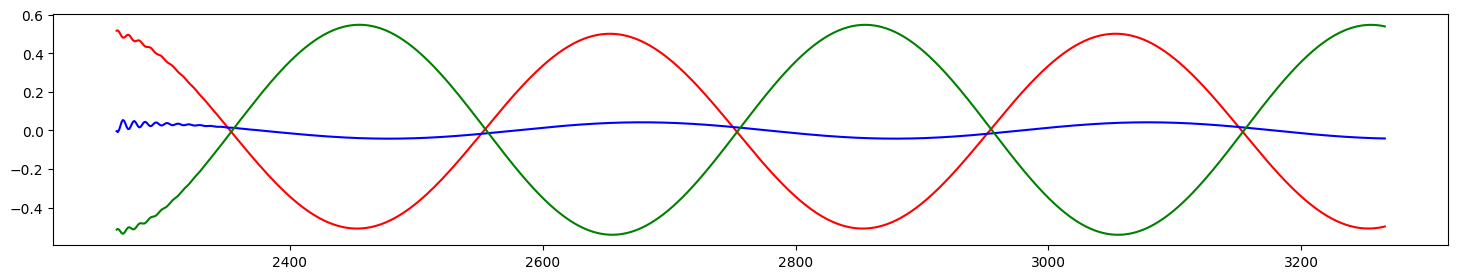

In [26]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

In [27]:
# 5. Faulty System with Line A - Line B - Line C
Line_ABC_Fault = data[data['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


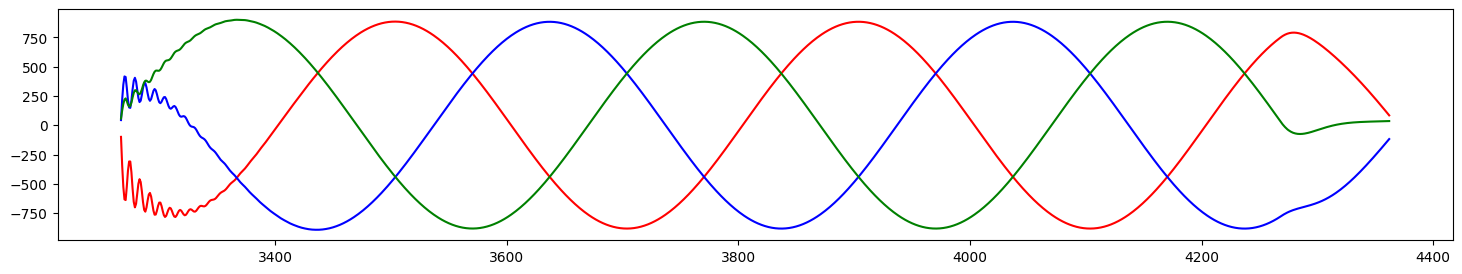

In [28]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

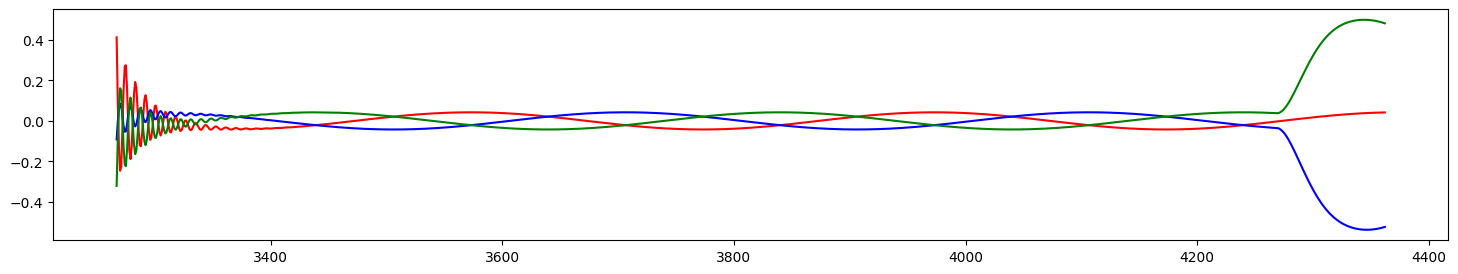

In [29]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

In [30]:
# 6. Faulty System with Line A - Line B - Line C - Ground
Line_ABCG_Fault = data[data['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


In [31]:
# Categorical to Numerical conversion
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Fault_Type'] = encoder.fit_transform(data['Fault_Type'])
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [32]:
# Dependent and Independent Variable Sepration
X = data.drop(['Fault_Type'],axis=1)
y = data['Fault_Type']

In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)


In [34]:
!pip install --upgrade scikit-learn

Training Accuracy    : 89.19 %
Model Accuracy Score : 89.13 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.54      1.00      0.70       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      0.15      0.27       201
           5       1.00      1.00      1.00       482

    accuracy                           0.89      1573
   macro avg       0.92      0.86      0.83      1573
weighted avg       0.94      0.89      0.87      1573

--------------------------------------------------------


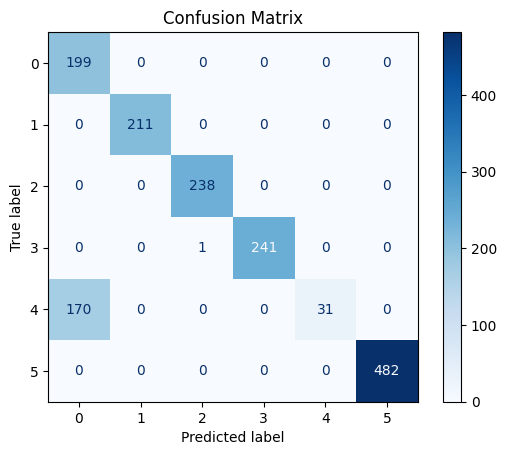

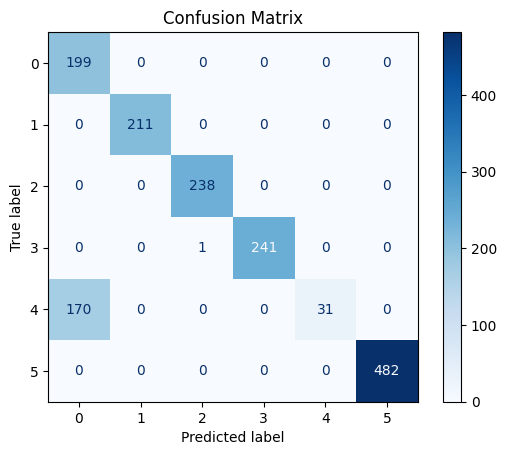

In [35]:
#supervices algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr), 
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#testing new methode
logreg1=LogisticRegression()
logreg1.fit(X_train,y_train)
y_pred_lr1=logreg1.predict(X_test)
log_train1=round(logreg1.score(X_train,y_train)*100,2)
log_accuracy1=round(accuracy_score(y_pred_lr1,y_test)*100,2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr1), 
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


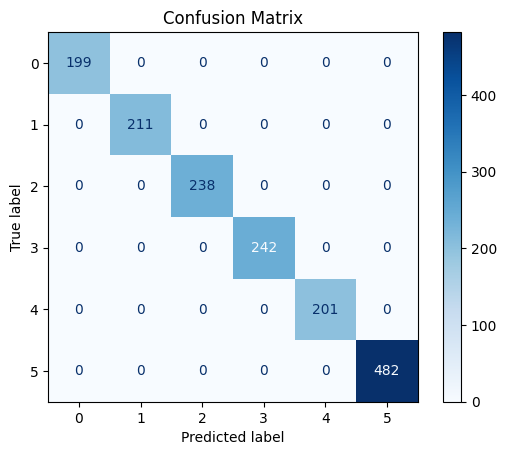

In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dec), 
                              display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [37]:
!pip install xgboost

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


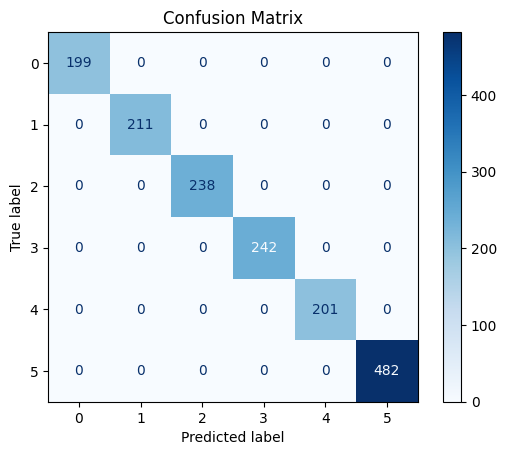

In [38]:
# Random Forest supervice algo
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), 
                                display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


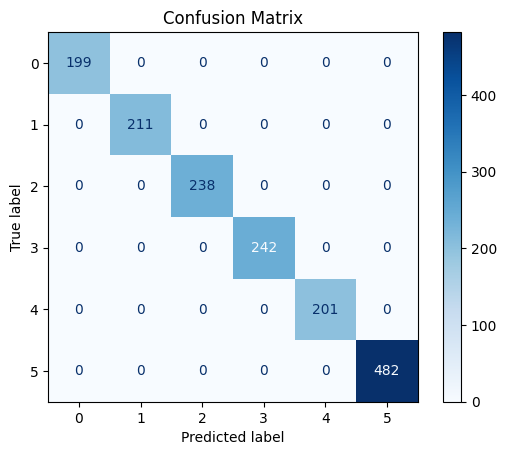

In [39]:
import xgboost as Xgb 
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb), 
                                display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 76.07 %
Model Accuracy Score : 75.97 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       199
           1       0.43      0.16      0.23       211
           2       0.76      0.79      0.78       238
           3       0.79      0.86      0.82       242
           4       0.80      0.89      0.84       201
           5       0.89      1.00      0.94       482

    accuracy                           0.76      1573
   macro avg       0.69      0.70      0.69      1573
weighted avg       0.73      0.76      0.73      1573

--------------------------------------------------------


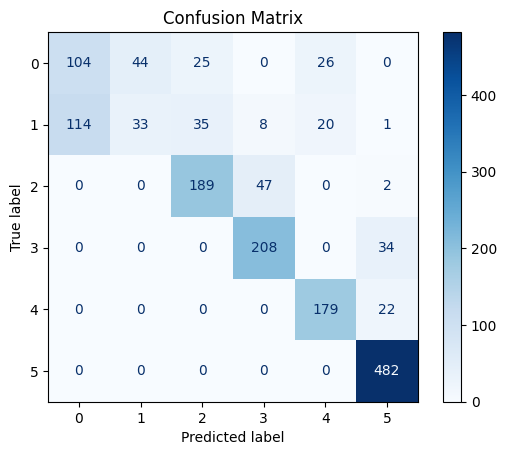

In [40]:
# Support Vector Machines supervices algo
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svc), 
                              display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# int The Results :

In [42]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[5 2 3 ... 5 5 1]


In [43]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
2927,4,0
3442,0,0
2996,4,0
4489,1,1
1575,2,2


In [44]:
#comparing models
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [45]:
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide(axis='index').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Random Forest,100.000000,100.000000
Decision Tree,100.000000,100.000000
XGBClassifier,100.000000,100.000000
Support Vector Machines,89.190000,89.130000
Logistic Regression,76.070000,75.970000
